In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cycler


In [80]:
#Set defualt setting for charts
colors = cycler('color',
               ['#EE6666', '#3388BB', '#9988DD',
                '#EECC55', '#88BB44', '#FFBBBB', '#CECCD2', '#6C757D', '#F7EB2C'])

plt.rcParams.update({
    'axes.facecolor': '#FFFFFF',     
    'axes.edgecolor': 'none',
    'axes.axisbelow': True,
    'axes.grid': True,
    'axes.prop_cycle': colors,
    'grid.color': 'lightgray',
    'grid.linestyle': '--',
    'grid.linewidth': 0.8,
    'xtick.direction': 'out',
    'xtick.color': '#6C757D',
    'ytick.direction': 'out',
    'ytick.color': '#6C757D',
    'patch.edgecolor': '#E6E6E6',
    'lines.linewidth': 2,
    'font.family': 'Times New Roman',
    'figure.autolayout': True

})

# **Data Cleaning**

#### Load data

In [2]:
bank_df = pd.read_csv('../data/input/bank-full.csv')

In [82]:
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


#### Find Null Values

In [83]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


There is no null values in this dataset.

#### Find and Drop Duplicated Rows

In [84]:
duplicated_rows = bank_df.duplicated()
bank_df[duplicated_rows]     #There is no duplicated rows

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


#### Find Columns with Multiple types

In [85]:
for col in bank_df.columns:
    types_in_col = set(bank_df[col].map(type))
    print(col, types_in_col)                   #There is no column with multiple type


age {<class 'int'>}
job {<class 'str'>}
marital {<class 'str'>}
education {<class 'str'>}
default {<class 'str'>}
balance {<class 'int'>}
housing {<class 'str'>}
loan {<class 'str'>}
contact {<class 'str'>}
day {<class 'int'>}
month {<class 'str'>}
duration {<class 'int'>}
campaign {<class 'int'>}
pdays {<class 'int'>}
previous {<class 'int'>}
poutcome {<class 'str'>}
y {<class 'str'>}


In [6]:
bank_df['job'] = bank_df['job'].str.replace('.', '')
bank_df['job'] = bank_df['job'].str.replace('-', '_')

In [7]:
bank_df.rename(columns={'y': 'is_participated'}, inplace=True)

#### Save Clean Dataset

In [8]:
# bank_df.to_csv('../data/output/clean_bank_dataset.csv', index= False)

# **Exploratory Data Analysis**

In [9]:
bank_df= pd.read_csv('../data/output/clean_bank_dataset.csv')

In [10]:
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,is_participated
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue_collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue_collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


#### <span style="color:#006699"><strong>Customer Age Analysis</strong></span>

In [91]:
#Calculate age among total customers
print(f'Average customer age   : {bank_df['age'].mean()}')
print(f'The youngest customer  : {bank_df['age'].min()}')
print(f'The Oldest customer    : {bank_df['age'].max()}')
print(f'Median customer age    : {bank_df['age'].median()}')
print(f'The Most frequency age : {bank_df['age'].mode()}')

Average customer age   : 40.93621021432837
The youngest customer  : 18
The Oldest customer    : 95
Median customer age    : 39.0
The Most frequency age : 0    32
Name: age, dtype: int64


In [92]:
bank_df.groupby('is_participated').agg(avg_age = ('age', 'mean'), min_age = ('age', 'min'), max_age = ('age', 'max'))

,avg_age,min_age,max_age
is_participated,,,
no,40.838986,18,95
yes,41.670070,18,95


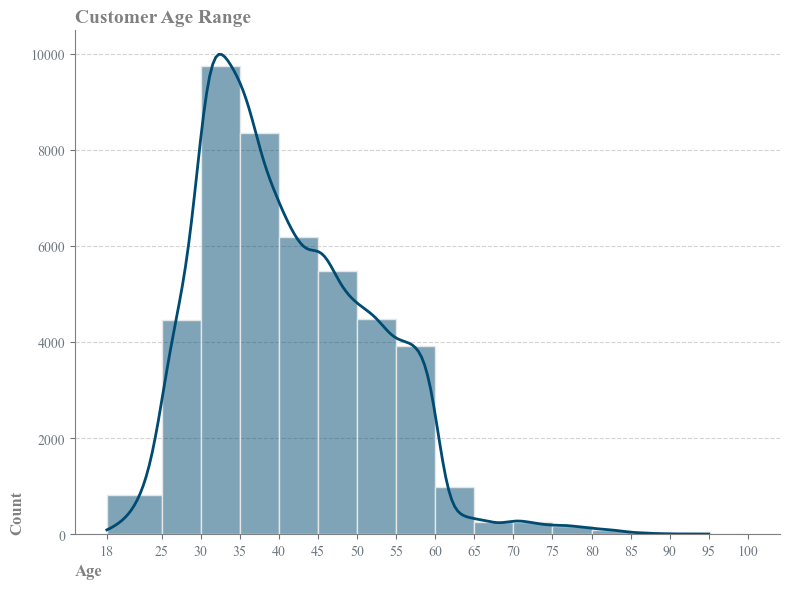

In [93]:
bins = [18, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
fig, ax = plt.subplots(figsize = (8, 6))

sns.histplot(data = bank_df, x = 'age', bins = bins, kde = True, color = '#004B72')

ax.set_xlabel('Age', loc = 'left', color = 'gray', weight = 'bold', fontsize = 12)
ax.set_ylabel('Count', loc = 'bottom', color = 'gray', weight = 'bold', fontsize = 12)
ax.set_title('Customer Age Range', loc = 'left', weight = 'bold', fontsize = 14, color = 'gray')
ax.spines[['left', 'bottom']].set_visible(True)
ax.spines[['left', 'bottom']].set_color('gray')
ax.set_xticks((bins))
ax.grid(axis= 'x',visible= False)
# plt.savefig('../chart/age_hist.jpeg', dpi = 300);

In [94]:
participants = bank_df[bank_df['is_participated'] == 'yes']
age_counts = participants['age'].value_counts().to_frame().reset_index()

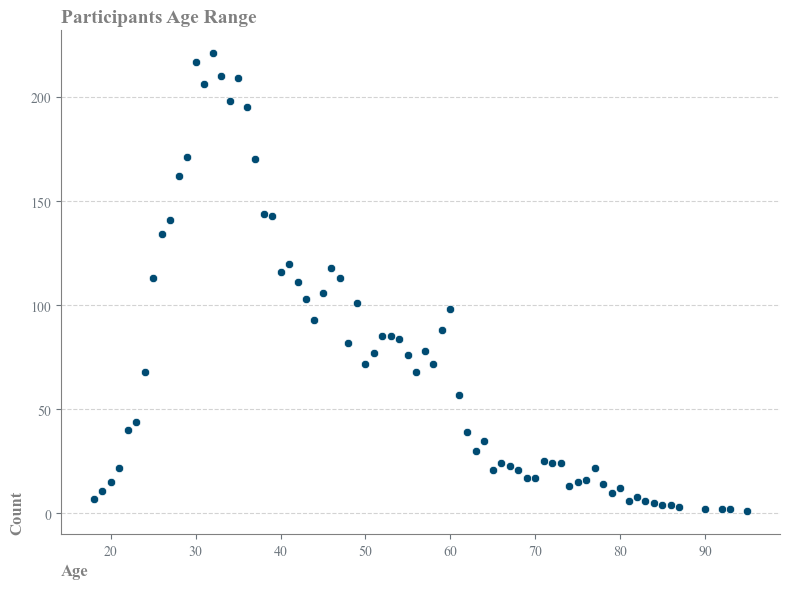

In [95]:
fig, ax = plt.subplots(figsize = (8, 6))

sns.scatterplot(data = age_counts, x = 'age', y = 'count', color = '#004B72', markers= 'o')

ax.set_xlabel('Age', loc = 'left', color = 'gray', weight = 'bold', fontsize = 12)
ax.set_ylabel('Count', loc = 'bottom', color = 'gray', weight = 'bold', fontsize = 12)
ax.set_title('Participants Age Range', loc = 'left', weight = 'bold', fontsize = 14, color = 'gray')
ax.spines[['left', 'bottom']].set_visible(True)
ax.spines[['left', 'bottom']].set_color('gray')
ax.grid(axis= 'x',visible= False)
# plt.savefig('../chart/participants_age_scatter.jpeg', dpi = 300);

The age of bank customers spans from **18 to 95 years**, with a **mean age of 40**. Examination of the age distribution among campaign participants indicates that the majority fall within the **25 to 40-year** age bracket. This suggests that individuals in this demographic exhibit a higher propensity for risk-taking, which translates to greater willingness to participate in new investment opportunities. Conversely, risk tolerance tends to decline with increasing age. Furthermore, younger customers, often engaged in educational pursuits, generally lack the financial capacity to partake in such investments.

#### <span style="color:#006699"><strong>Marital Status of Customers</strong></span>

In [96]:
marital_grouped = (bank_df['marital'].value_counts()).to_frame().reset_index()
marital_grouped

,marital,count
0,married,27214
1,single,12790
2,divorced,5207


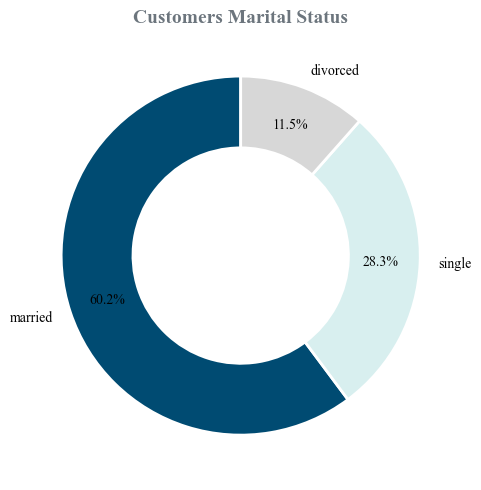

In [97]:
colors = ['#004B72', '#D8EFEF', '#D7D7D7']

plt.figure(figsize=(5, 6))
plt.pie(
    marital_grouped['count'], 
    labels=marital_grouped['marital'], 
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=90,
    wedgeprops={'width':0.4, 'edgecolor':'white', 'linewidth':2},  
    textprops={'color':'black'},
    pctdistance=0.78 
)

plt.title('Customers Marital Status', color = '#6C757D', weight='bold', fontsize=14)
# plt.savefig('../chart/marital_status.jpeg', dpi=300)
plt.show()

**60% customers in this dataset are married**, 28% single and 11% divorced. With 60% share, married customers make up the largest segment of our customer base. This means that marketing campaigns or products should be designed to address family-oriented needs and concerns.

#### <span style="color:#006699"><strong>Campaign Awareness Among Customers</strong></span>

In [98]:
#Total customers awareness
contact_type_totals = bank_df.groupby('contact', as_index= False).agg(total = ('contact', 'count'))
contact_type_totals

,contact,total
0,cellular,29285
1,telephone,2906
2,unknown,13020


In [99]:
#Customers who participated in campaign
campaign_participators = bank_df[(bank_df['is_participated'] == 'yes')]
participators_contact_type = campaign_participators.groupby('contact', as_index= False).agg(participants = ('contact', 'count'))
participators_contact_type

,contact,participants
0,cellular,4369
1,telephone,390
2,unknown,530


In [100]:
#Dataframe for chart
merged = contact_type_totals.merge(participators_contact_type, on = 'contact')
merged = merged.sort_values('total')
merged

,contact,total,participants
1,telephone,2906,390
2,unknown,13020,530
0,cellular,29285,4369


In [101]:
#Participation of customers without prior contact in previous campaign

(bank_df[(bank_df['pdays'] == -1)]).groupby('is_participated').agg(count = ('is_participated', 'count'))

,count
is_participated,
no,33570
yes,3384


In [124]:
#Frequency of contacts base on month (total customers)
total_month_frequency = bank_df.groupby('month', as_index= False).agg(count = ('month', 'count'))
total_month_frequency

,month,count
0,apr,2932
1,aug,6247
2,dec,214
3,feb,2649
4,jan,1403
5,jul,6895
6,jun,5341
7,mar,477
8,may,13766
9,nov,3970


In [128]:
#Frequency of contacts base on month (participants customers)
participants_month_frequency =participants.groupby('month', as_index= False).agg(count = ('month', 'count'))
participants_month_frequency

,month,count
0,apr,577
1,aug,688
2,dec,100
3,feb,441
4,jan,142
5,jul,627
6,jun,546
7,mar,248
8,may,925
9,nov,403


In [104]:
#Data for chart
labels = merged['contact'].astype(str)
total_counts = merged['total']
participated_counts = merged['participants']

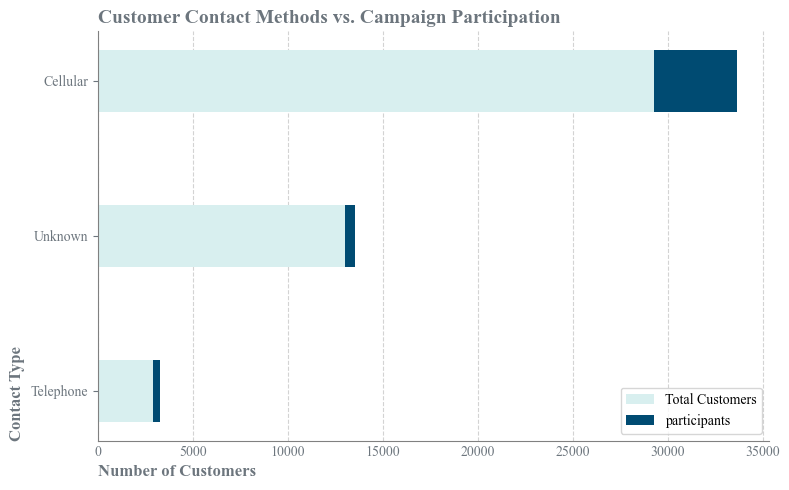

In [105]:
x = np.arange(len(labels))

figure, ax = plt.subplots(figsize=(8, 5))
ax.barh(x, total_counts, height = 0.4, label='Total Customers', color='#D8EFEF')
ax.barh(x, participated_counts, height = 0.4, left=total_counts, label='participants', color='#004B72')

ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.set_ylabel('Contact Type', loc='bottom', color='#6C757D', weight='bold', fontsize=12)
ax.set_xlabel('Number of Customers', loc='left', color='#6C757D', weight='bold', fontsize=12)
ax.set_title('Customer Contact Methods vs. Campaign Participation', loc='left', color='#6C757D', weight='bold', fontsize=14)
ax.tick_params(axis='x', which='both', length=0)
ax.grid(axis='y', visible=False)
ax.set_yticklabels(['Telephone', 'Unknown', 'Cellular'])
ax.spines[['bottom', 'left']].set_visible(True)
ax.spines[['bottom', 'left']].set_color('gray')
# plt.savefig('../chart/contact_method.jpeg', dpi=300)
ax.legend();


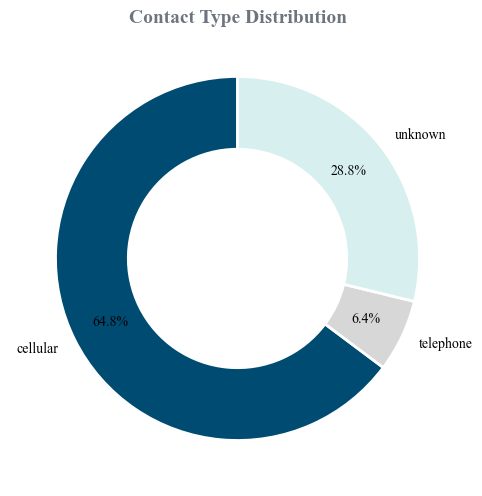

In [106]:
colors = ['#004B72', '#D7D7D7', '#D8EFEF']

plt.figure(figsize=(5, 6))
plt.pie(
    contact_type_totals['total'], 
    labels=contact_type_totals['contact'], 
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=90,
    wedgeprops={'width':0.4, 'edgecolor':'white', 'linewidth':2},  
    textprops={'color':'black'},
    pctdistance=0.78 
)

plt.title('Contact Type Distribution', color = '#6C757D', weight='bold', fontsize=14)
# plt.savefig('../chart/contact_type_piechart.jpeg', dpi=300)
plt.show()

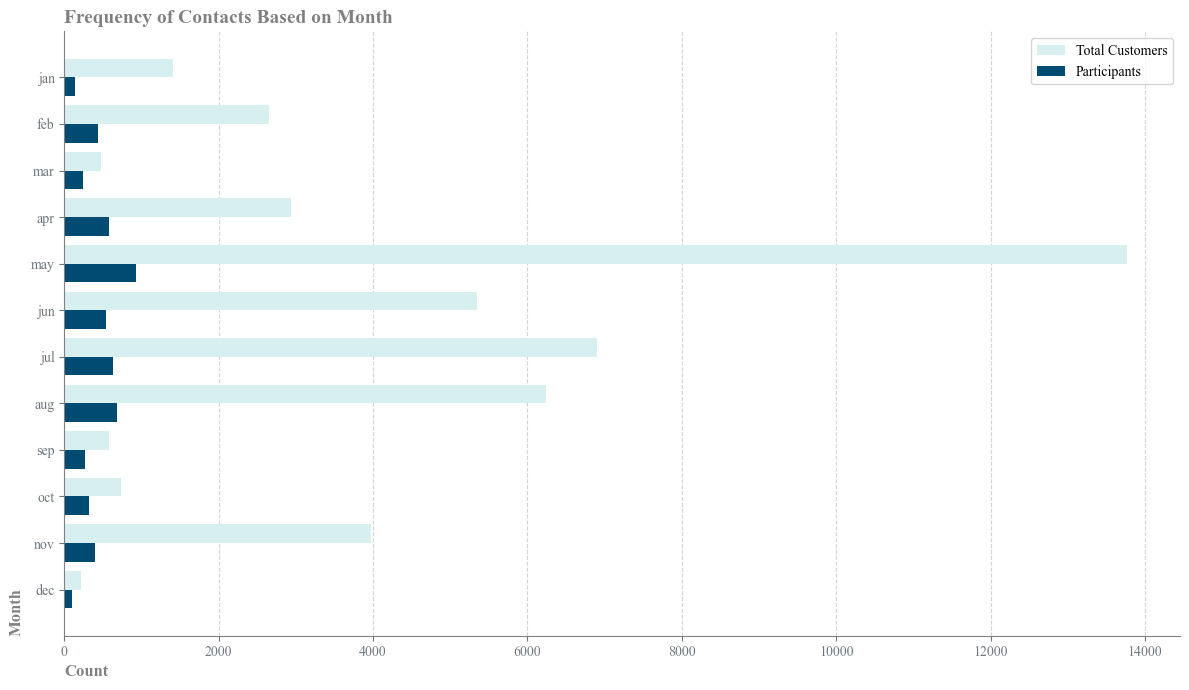

In [129]:
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

participants_month_frequency['month'] = pd.Categorical(participants_month_frequency['month'], categories=month_order, ordered=True)
participants_month_frequency = participants_month_frequency.sort_values('month')

total_month_frequency['month'] = pd.Categorical(total_month_frequency['month'], categories=month_order, ordered=True)
total_month_frequency = total_month_frequency.sort_values('month')

bar_width = 0.4
indices = np.arange(len(month_order))

fig, ax = plt.subplots(figsize=(12,7))

ax.barh(indices - bar_width/2, total_month_frequency['count'], height=bar_width, label='Total Customers', color='#D8EFEF')

ax.barh(indices + bar_width/2, participants_month_frequency['count'], height=bar_width, label='Participants', color='#004B72')

ax.set_yticks(indices, month_order)
ax.set_xlabel('Count', loc = 'left', weight = 'bold', color = 'gray', fontsize = 12)
ax.set_ylabel('Month', loc = 'bottom', weight = 'bold', color = 'gray', fontsize = 12)
ax.set_title('Frequency of Contacts Based on Month', loc = 'left', color = 'gray', weight = 'bold', fontsize = 14)
ax.legend()
plt.gca().invert_yaxis()  
ax.spines[['left', 'bottom']].set_visible(True)
ax.spines[['left', 'bottom']].set_color('gray')
ax.grid(axis = 'y', visible= False)
# plt.savefig('../chart/frequency_contact.jpeg', dpi=300);

Approximately **65% (29,285 individuals)** of customers were informed about the campaign via mobile phone. Of these, **82%** of those who participated in the campaign had learned about it through mobile phone contact. Meanwhile, the impact of telephone was significantly lower compared to other miscellaneous sources of information.

Only **7% of customers who were not contacted** in the previous campaign participated in this campaign.

Contact frequency peaks in **May, July, and August** for both total customers and participants, indicating higher campaign activity and engagement during these months. Lower contact and participation rates occur in December, March, and September, suggesting seasonal variation. Focusing efforts on peak months could improve overall campaign effectiveness.

#### <span style="color:#006699"><strong>Customer Acceptance by Contact Attempt Number</strong></span>

In [108]:
#For total customers
print(f'Total customers in this bank: {bank_df.shape[0]}')

total_duration = bank_df.groupby('campaign', as_index= False).agg(count = ('campaign', 'count'),
                                                average_duration = ('duration', 'mean'),
                                                min_duration = ('duration', 'min'),
                                                max_duration = ('duration', 'max')).head(10)
total_duration

Total customers in this bank: 45211


,campaign,count,average_duration,min_duration,max_duration
0,1,17544,261.053637,1,4918
1,2,12505,275.326030,0,3422
2,3,5521,271.638834,2,3881
3,4,3522,253.194492,0,3078
4,5,1764,230.551020,6,2330
5,6,1291,217.083656,6,2372
6,7,735,213.349660,5,1739
7,8,540,194.325926,7,1576
8,9,327,220.030581,6,2692
9,10,266,189.150376,6,1603


In [109]:
#Participant customers
print(f'Total participant customers in this campaign: {participants.shape[0]}')

participants_duration = ((bank_df[bank_df['is_participated'] == 'yes']).groupby('campaign', as_index= False)
                                                                  .agg(count = ('campaign', 'count'),
                                                                       average_duration = ('duration', 'mean'),
                                                                       min_duration = ('duration', 'min'),
                                                                       max_duration = ('duration', 'max'))).head(10)
participants_duration

Total participant customers in this campaign: 5289


,campaign,count,average_duration,min_duration,max_duration
0,1,2561,472.445529,8,3253
1,2,1401,559.635261,49,3183
2,3,618,591.475728,46,3881
3,4,317,662.388013,63,2769
4,5,139,645.158273,93,2330
5,6,92,705.630435,78,2372
6,7,47,727.574468,95,1471
7,8,32,608.968750,89,1576
8,9,21,904.047619,252,2692
9,10,14,805.285714,136,1603


In [110]:
participants['duration'].sum()   #Total talking duration to persuade customers = 1 month

np.int64(2841751)

In [111]:
bank_df['duration'].sum()   #Total talking duration to all customers = 4.5 month

np.int64(11671811)

The analysis indicates that the **first contact** is the most effective in persuading customers, with subsequent calls having little impact. Longer call durations do not necessarily increase success, as **calls averaging around 8 minutes** were sufficient for participants. Therefore, focusing on improving the quality of the initial call and training agents accordingly can optimize campaign effectiveness and resource allocation.

#### <span style="color:#006699"><strong>Analyzing Customers with Loan and Housing Flags</strong></span>

In [112]:
loan_flag = bank_df[(bank_df['housing'] == 'yes') &
                    (bank_df['loan'] == 'yes')]

In [113]:
#ّFind which customers participated 
loan_flag['is_participated'].value_counts()

is_participated
no     4102
yes     265
Name: count, dtype: int64

In [114]:
#Customers who are in debt to the bank
((loan_flag['balance'] < 0) & (loan_flag['is_participated'] == 'no')).sum()

np.int64(709)

In [115]:
#Marital status of non-participants
(loan_flag[loan_flag['is_participated'] == 'no']).groupby('marital', as_index= False).agg(count = ('marital', 'count'))

,marital,count
0,divorced,468
1,married,2806
2,single,828


In [116]:
#Relation between Campaign Participation and Customers with Overdue Installments
participants['default'].value_counts()

default
no     5237
yes      52
Name: count, dtype: int64

A possible reason why **10%** of individuals did not participate in the campaign is their indebtedness to the bank due to holding a loan. Additionally, some of them have a **negative balance** and are married, which might be an even stronger reason for their non-participation. Less than 1% participated in the new campaign despite having a loan. The bank has reliable customers, and those few with overdue payments did not participate in the new campaign.

**Analyzing customers which have loan and housing**
| Participated | Percentage  |Strong Reason
|--------------|-------------|----------------------------------------------
|      No      |     10%     |Most of them are married and in debt to bank
|     Yes      |     <1%     |Most of them are not in debt 


#### <span style="color:#006699"><strong>Previous Outcome Effect on Customers</strong></span>

In [117]:
bank_df.groupby(['is_participated', 'poutcome'], as_index= False).agg(count = ('poutcome', 'count'))

,is_participated,poutcome,count
0,no,failure,4283
1,no,other,1533
2,no,success,533
3,no,unknown,33573
4,yes,failure,618
5,yes,other,307
6,yes,success,978
7,yes,unknown,3386


**74% of the total customers did not participate** in the previous campaign either. This indicates that, overall, the campaigns have not been sufficiently appealing to the customers, resulting in a low willingness to participate in both past and current campaigns. Customers with a successful outcome (success) in the previous campaign **are more likely to participate** again, reflecting increased trust and motivation following a positive experience. Conversely, those who experienced failure (failure) or had no prior contact (unknown) showed less inclination to engage in the new campaign, possibly due to negative past experiences or lack of awareness.

## **<span style="color:#006699">Final Overview of Campaign Participants:</span>**

**1- The majority of participants were aged between 25–40 years.**

**2- Most held a high school diploma level of education.**

**3- Managerial positions were the predominant occupation among participants.** 

**4- Participation peaked in May, aligning with the highest campaign contact frequency.**  

**5- Participants were generally convinced to join after a single call lasting ~8 minutes.**

**6- Previous campaign success significantly influenced participants' decision to engage again.** 

**7- Having loans or outstanding debts with the bank served as a deterrent to campaign participation.** 
 
**8- Only 12% of the total customers showed willingness to participate in the campaign, indicating limited appeal among the customer base.**